### Last name: Khambanonda
### First name: Yanisa
### Student number: 1003883005
### List of collaborators (if any): 
* Last name, first name
* Last name, first name
* Last name, first name

# Part 0: Preliminaries

In this exercise narrated and partially prepared by me (Mohannad Shehadeh), we'll be looking at some applications of eigenvalues and eigenvectors. Extremely useful and powerful tools can be developed once the theory of diagonalizability is studied, but for this exercise, we will only be concerned with a precursory emperical study of eigenvalues and eigenvectors. 

Before proceeding, I'd like to provide a reminder again for you to try to read *everything* written in this notebook carefully. Generally speaking, despite the fact that I like to ramble, everything that's written in the notebook is directly relevant to you being able to do some part of the exercise correctly and *easily.*

We'll start by reviewing some basic facts and clarifying some common sources of confusion about eigenvalues and eigenvectors. A very elementary understanding of these facts will suffice for the purposes of this exercise.
- A **nonzero** vector $\mathbf x$ is an eigenvector of a square matrix $\mathbf A$ if $\mathbf A \mathbf x = \lambda \mathbf x$ for some scalar $\lambda$ (which could be zero) 
- $\lambda$ is called an eigenvalue of $\mathbf A$ and $\mathbf x$ is called a corresponding eigenvector
- If $\mathbf x$ is an eigenvector of $\mathbf A$, then $c \mathbf x$  is also an eigenvector of $\mathbf A$ for any nonzero scalar $c$ 
- If $\mathbf x$ and $\mathbf y$ are linearly independent eigenvectors corresponding to the same eigenvalue $\lambda$, then you can verify that any linear combination of them is also an eigenvector corresponding to that eigenvalue. This means that any nonzero vector in their span which is a two-dimensional subspace is also an eigenvector 
- For this reason, it is more precise to talk about an eigenspace corresponding to a particular eigenvalue
- With this in mind, when we refer to "the" eigenvector corresponding to some $\lambda$  where there is no other linearly independent eigenvector corresponding to $\lambda$, we usually mean that it's some choice of normalization and sign of eigenvector (which would form a basis for the corresponding one-dimensional eigenspace, a line)
- When we refer to an eigenvalue as having "two" eigenvectors, we usually mean that it has two linearly independent eigenvectors meaning that any nonzero linear combination of them is an eigenvector, and the "two" refers to any linearly independent pair (which would form a basis for the corresponding two-dimensional eigenspace)
- In summary, if a matrix has an eigenvector, then it has infinitely many living in an associated eigenspace, and sometimes the term "eigenvectors" is used interchangeably to refer to basis vectors for that eigenspace, or all the nonzero vectors in the eigenspace itself which is a source of confusion
- From these statements, it is clear that eigenvectors corresponding to the same eigenvalue may or may not be linearly independent. However, it can be shown that eigenvectors corresponding to distinct eigenvalues are always linearly independent. You can prove this by induction. 


If you've understood and retained all of these statements, especially the first and last, then you can be assured that you're already ahead of many people in your understanding of eigenvalues and eigenvectors

An aside on a Julia technicality: 

Obtaining the transpose of a matrix ```A``` in Julia using ```'``` (conjugate transpose) or ```transpose``` does not actually create a transposed version of the matrix to avoid wasting time and space (memory). Rather it creates an object which will behave like the transpose when you print it or multiply it by other matrices. To obtain an actual transpose, you can use ```copy``` as in the following example.

In [1]:
using Plots
using LinearAlgebra
using DelimitedFiles

In [2]:
A = [1 2 3; 4 5 6]

2×3 Array{Int64,2}:
 1  2  3
 4  5  6

In [3]:
A' # Of type "Adjoint" (meaning complex conjugate of transpose or Hermitian transpose, same as transpose if real)

3×2 Adjoint{Int64,Array{Int64,2}}:
 1  4
 2  5
 3  6

In [4]:
copy(A') # What you'd expect

3×2 Array{Int64,2}:
 1  4
 2  5
 3  6

# Part 1: Eigenvalues and eigenvectors of geometric transformations

A two-dimensional rotation matrix is given by:
\begin{equation}
    R(\theta) = 
    \begin{bmatrix}
    \cos(\theta) & -\sin(\theta) \\
    \sin(\theta) & \cos(\theta)
    \end{bmatrix}
\end{equation}

A hyperbolic rotation matrix is given by:
\begin{equation}
    H(\phi) = 
    \begin{bmatrix}
    \cosh(\phi) & \sinh(\phi) \\
    \sinh(\phi) & \cosh(\phi)
    \end{bmatrix}
\end{equation}

In [5]:
R(θ) = [cos(θ) -sin(θ); sin(θ) cos(θ)];
H(ϕ) = [cosh(ϕ) sinh(ϕ); sinh(ϕ) cosh(ϕ)];

It can be shown that the eigenvalues of $H(\phi)$ are $\lambda_1 = e^\phi$ and $\lambda_2 = e^{-\phi}$ with corresponding eigenvectors 

$$
u_1 = \begin{bmatrix}
1\\
1
\end{bmatrix}
\quad 
u_2 = \begin{bmatrix}
1\\
-1
\end{bmatrix}
$$

We compute these using the ```eigen``` function as follows for $\phi = 1$

In [6]:
eig = eigen(H(1))

Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
eigenvalues:
2-element Array{Float64,1}:
 0.36787944117144245
 2.718281828459045  
eigenvectors:
2×2 Array{Float64,2}:
 -0.707107  0.707107
  0.707107  0.707107

In [7]:
eig.values # Vector of eigenvalues 

2-element Array{Float64,1}:
 0.36787944117144245
 2.718281828459045  

In [8]:
eig.vectors # Matrix whose columns are the corresponding eigenvectors

2×2 Array{Float64,2}:
 -0.707107  0.707107
  0.707107  0.707107

Observe that these correspond to different constant multiples (possibly negative) of what we claimed were "the" eigenvectors

**If** the eigenvalues are real, they can be sorted. 

However, the default sorting behavior is currently inconsistent across versions of Julia for a technical reason so don't assume that they'll be sorted in any way. Or, double check manually that they are sorted the way you want them to be if you write code which relies on them being sorted in some way. 

Alternatively, we can, for example, find the eigenvector corresponding to the largest eigenvalue as follows:

In [9]:
argmax(eig.values) # Gets index of largest eigenvalue

2

In [10]:
eig.vectors[:,argmax(eig.values)] # Gets the vector in the corresponding column

2-element Array{Float64,1}:
 0.7071067811865475
 0.7071067811865475

The following code will plot on the left a collection of vectors obtained by rotating $\begin{bmatrix}1 & 0\end{bmatrix}^T$ and on the right, the result of applying $H(\phi)$ to those vectors. You should experiment with changing the number of vectors $N$ and the parameter $\phi$, but the choices of $N = 8,\, \phi = 0.82$ are good for answering the question that follows.

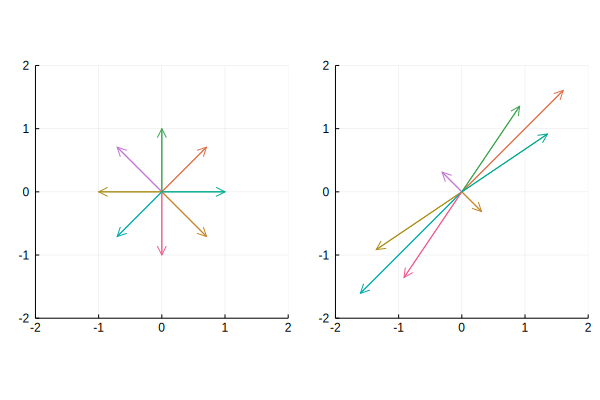

In [11]:
N = 8
ϕ = 0.82
p1 = quiver([0],[0],quiver=([0],[0]),xlim=(-2,2), ylim=(-2,2), aspect_ratio = :equal)
for k = 1:N 
    θ = 2*pi*k/N
    u = R(θ) * [1; 0]
    quiver!([0],[0],quiver=([u[1]],[u[2]]))
end
p2 = quiver([0],[0],quiver=([0],[0]),xlim=(-2,2), ylim=(-2,2), aspect_ratio = :equal)
for k = 1:N
    θ = 2*pi*k/N
    u = R(θ) * [1; 0]
    v = H(ϕ) * u 
    quiver!([0],[0],quiver=([v[1]],[v[2]]))
end 
plot(p1,p2,layout=(1,2),legend=false)

**Exercise:** How does the above plot illustrate what you know about the two eigenvalues and eigenvectors of $H(\phi)$?

Answer: By looking at the vectors in the first figure and comparing them to vectors of the second figure, it can be seen that there are only two direction/angles of vectors where by the transformation H does not affect the direction of the vectors. Basically, the purple + orange and blue + red vectors appear the same/untransformed through the transformation except that their magnitudes are multiplied by some sort of scalar. Thus, these vectors are eigenvectors and the amount of scaling these vectors require to transform the left graph vectors to the right, are the eigenvalues. Looking at these vectors we see that the purple + orange are scalar multiples of the vector (-0.707,0.707) and similarly the blue + red vectors of (0.707,0.707). By comparing the magnitudes of the eigenvetors after the transformation it can be seen that the eigenvalues are approximately 0.36 and 2.7 resectively. By the graphs we can identify the eigenvectors and eigenvalues by seeing which vectors appear to maintain their direction and the scalar difference between these vectors. 

A two-dimensional horizontal shear matrix is given by:
\begin{equation}
    S(\beta) = 
    \begin{bmatrix}
    1 & \beta \\
    0 & 1
    \end{bmatrix}
\end{equation}

In [12]:
S(β) = [1 β; 0 1];

It can be shown that $S(\beta)$ has eigenvalue $\lambda = 1$ and eigenvector
$$
u = \begin{bmatrix}
1\\
0
\end{bmatrix}
$$

We compute these using the ```eigen``` function for $\beta = 4$, though they are independent of $\beta$

In [13]:
eigen(S(4))

Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
eigenvalues:
2-element Array{Float64,1}:
 1.0
 1.0
eigenvectors:
2×2 Array{Float64,2}:
 1.0  -1.0        
 0.0   5.55112e-17

There's really only "one" eigenvector here, but this doesn't mean that you can't have different (linearly independent) eigenvectors corresponding to the same eigenvalue!

The following code will plot on the left a collection of vectors obtained by rotating $\begin{bmatrix}1 & 0\end{bmatrix}^T$ and on the right, the result of applying $S(\beta)$ to those vectors. You should experiment with changing the number of vectors $N$ and the parameter $\beta$, but the choices of $N = 8,\, \beta = 1.5$ are good for answering the question that follows.

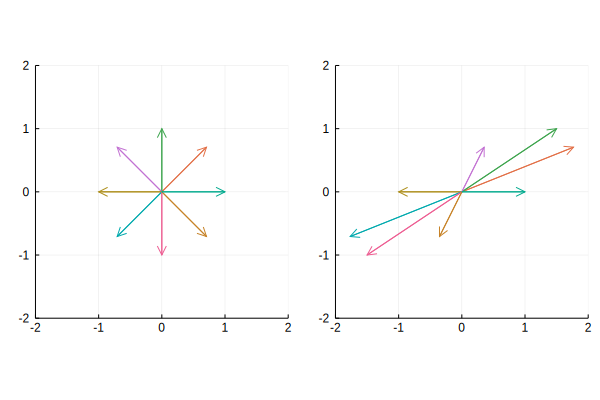

In [14]:
N = 8
β = 1.5
p1 = quiver([0],[0],quiver=([0],[0]),xlim=(-2,2), ylim=(-2,2), aspect_ratio = :equal)
for k = 1:N
    θ = 2*pi*k/N
    u = R(θ) * [1; 0]
    quiver!([0],[0],quiver=([u[1]],[u[2]]))
end 
p2 = quiver([0],[0],quiver=([0],[0]),xlim=(-2,2), ylim=(-2,2), aspect_ratio = :equal)
for k = 1:N
    θ = 2*pi*k/N
    u = R(θ) * [1; 0]
    v = S(β) * u 
    quiver!([0],[0],quiver=([v[1]],[v[2]]))
end 
plot(p1,p2,layout=(1,2),legend=false)

**Exercise:** How does the above plot illustrate what you know about the eigenvalue and eigenvector of $S(\beta)$?

Answer: From the graphs above we can see that all but two vectors (the gold and turquoise horizontal vectors) have changed direction when transformed using S. The devtors that maintained their directions and resulted in a scaled version of their original form are eigenvectors! Thus the eigenvectors present in the graph are vectors (-1,0) and (1,0). Furthermore, since the eigenvectors did not change magnitudes it can be inferred that the corresponding eigenvalue for these vectors is 1 (as the result is scaled by a factor of 1). 

The Rayleigh quotient with respect to some matrix $\mathbf A$ is defined as 
$$
R(\mathbf v)=\frac{\mathbf{v^T}A\mathbf v}{\mathbf{v^T}\mathbf{v}}
$$
with $\mathbf v \neq \mathbf 0$. For symmetric matrices like $H(\phi)$, the Rayleigh quotient has some notable properties. 

In [15]:
RQ(A,v) = v'*A*v/(v'*v)

RQ (generic function with 1 method)

The following code will plot the Rayleigh quotient for $H(1)$ providing a contour plot on the right. 

In [16]:
eigen(H(1))

Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
eigenvalues:
2-element Array{Float64,1}:
 0.36787944117144245
 2.718281828459045  
eigenvectors:
2×2 Array{Float64,2}:
 -0.707107  0.707107
  0.707107  0.707107

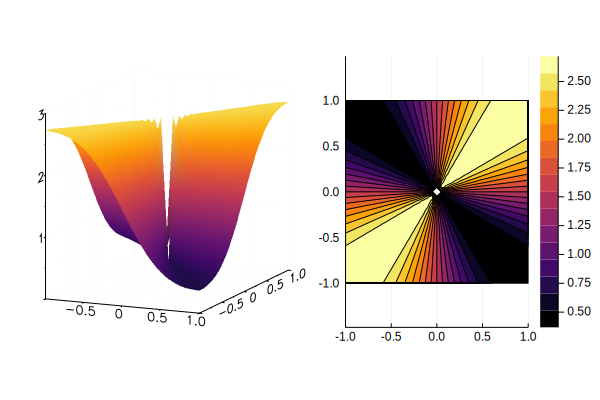

In [17]:
x = [c for c in -1:0.05:1]
y = [c for c in -1:0.05:1]
RQ_H(x,y) = RQ(H(1), [x, y])
p1 = plot(x, y, RQ_H, st =:surface,legend=:none)
p2 = plot(x, y, RQ_H, st =:contourf,aspect_ratio = :equal)
plot(p1,p2,layout=(1,2),legend=false)

**Exercise:** From examining the plot, what are the maxima and minima of the Rayleigh quotient and where do they occur?

Answer: The maxima of the rayleigh quotient is approcimately 2.75 and occurs at vectors k(1,1) where k is a scalar. The minima is 0.50 which occurs at k(-1,1) where k is a scalar.  

# Part 2: Simple Markov chains

In this part, we'll be providing some examples of simple Markov chains as a precursor to the final part. You are not expected to understand Markov chains deeply here as it is beyond the scope of the course. Understanding what we are trying to compute is enough and some amount of explanation is provided to give you some intuition for what it means. 

The following is an example of a simple Markov chain taken from https://en.wikipedia.org/wiki/Examples_of_Markov_chains
![](Markov_Chain_weather_model_matrix_as_a_graph.png)

Vertices of this graph (Sunny, Rainy) are called states and edges (arrows) represent probabilities of transitioning between states at any given time. We can represent this as a matrix $\mathbf P$ where entry $i,j$ is the probability of transitioning to state $j$ from state $i$ at any given time. We get
$$
\mathbf P = \begin{bmatrix}
0.9 & 0.1 \\
0.5 & 0.5 \\
\end{bmatrix}
$$
We can let a vector $\mathbf x_k$ contain the probabilities of a sunny or rainy day at day $k$. If it's sunny today, we will have $\mathbf x_0 = \begin{bmatrix} 1 & 0 \end{bmatrix}$.
The probabilities of a sunny or rainy day tomorrow can be obtained as 
$$
\mathbf x_1 = \mathbf x_0 \mathbf P = \begin{bmatrix} 1 & 0 \end{bmatrix}
\begin{bmatrix}
0.9 & 0.1 \\
0.5 & 0.5 \\
\end{bmatrix} 
= \begin{bmatrix} 0.9 & 0.1 \end{bmatrix}
$$
The probability of a sunny or rainy day the day after tomorrow can be obtained as
$$
\mathbf x_2 = \mathbf x_1 \mathbf P = \mathbf x_0 \mathbf P^2
= \begin{bmatrix} 0.86 & 0.14 \end{bmatrix}
$$
And in general, the probability of a sunny or rainy day at day $n$ is given by
$$
\mathbf x_n = \mathbf x_{n-1} \mathbf P = \mathbf x_0 \mathbf P^n
$$
Note that the rows of the matrix always sum up to one, as well as the entries of $\mathbf x_k$ since they represent probabilities. Equivalently, the sums of the numbers on the outgoing edges of a vertex of the graph add up to 1. 

In [18]:
P = [0.9 0.1; 0.5 0.5] # Transition matrix

2×2 Array{Float64,2}:
 0.9  0.1
 0.5  0.5

In [19]:
sum(P, dims=2) # Compute the sum along the rows, across dimension 2

2×1 Array{Float64,2}:
 1.0
 1.0

In [20]:
x_0 = [1 0]

1×2 Array{Int64,2}:
 1  0

In [21]:
x_1 = x_0*P

1×2 Array{Float64,2}:
 0.9  0.1

In [22]:
x_2 = x_1*P

1×2 Array{Float64,2}:
 0.86  0.14

In [23]:
x_2 = x_0*P^2

1×2 Array{Float64,2}:
 0.86  0.14

Observe that as we raise the matrix to higher powers, it appears to converge to a matrix with constant columns:

In [24]:
P^3

2×2 Array{Float64,2}:
 0.844  0.156
 0.78   0.22 

In [25]:
P^5

2×2 Array{Float64,2}:
 0.83504  0.16496
 0.8248   0.1752 

In [26]:
P^10

2×2 Array{Float64,2}:
 0.833351  0.166649
 0.833246  0.166754

In [27]:
P^100

2×2 Array{Float64,2}:
 0.833333  0.166667
 0.833333  0.166667

It can be shown that for Markov chains with certain properties, the powers of the transition matrix will indeed converge to some matrix with constant columns. (Though this is not simple or obvious so don't worry about it.)

In this case, left multiplying by our $\mathbf x_0$ or any $\mathbf x_k$ where the entries add up to 1 will just give us a row of the matrix. This is called the steady state distribution of the Markov chain and will represent the long-term probability of each state, i.e., the long-term proportions of sunny and rainy days. 
We consequently expect that 
$$
\lim_{n \to \infty} \mathbf x_n =  \lim_{n \to \infty} \mathbf x_0 \mathbf P^n = \lim_{n \to \infty} \mathbf x_{n-1} \mathbf P
$$
will converge to a steady state distribution $\mathbf x_\infty$. We would intuitively expect from the above relationships that $\mathbf x_\infty = \mathbf x_\infty \mathbf P$, i.e., that $\mathbf x_\infty$ is a left eigenvector of $\mathbf P$. This is equivalent to $\mathbf{x_\infty^T} = \mathbf{P^T}\mathbf{x_\infty^T}$. So we just need to find an eigenvector of $\mathbf{P^T}$ corresponding to eigenvalue $1$ and normalized so that the entries add up to 1. It can be shown that this is indeed what the rows of $\mathbf P^n$ converge to. Moreover, it can also be shown that $1$ is the largest eigenvalue.

We verify that this is indeed the case:

In [28]:
eig = eigen(copy(P'))

Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
eigenvalues:
2-element Array{Float64,1}:
 0.4
 1.0
eigenvectors:
2×2 Array{Float64,2}:
 -0.707107  0.980581
  0.707107  0.196116

We would like to get the eigenvector corresponding to eigenvalue $1$ which is the largest eigenvalue. 

In [29]:
x_inf = eig.vectors[:,argmax(eig.values)]

2-element Array{Float64,1}:
 0.9805806756909201 
 0.19611613513818404

In [30]:
x_inf = x_inf./sum(x_inf) # Normalize so entries add up to 1

2-element Array{Float64,1}:
 0.8333333333333334 
 0.16666666666666669

In [31]:
@assert norm(x_inf - (P^100)[1,:]) < 10^-7

The following is a Markov chain taken from https://en.wikipedia.org/wiki/Markov_chain
![](Finance_Markov_chain_example_state_space.svg.png)

**Exercise:** Taking Bull market as the first state, Bear market as the second, and Stagnant market as the third, compute the steady state distribution of this markov chain $\mathbf x_\infty$ and store the result in a variable called ```x_inf```. (You can use the ```eigen``` function as we just did.)

In [32]:
# BEGIN SOLUTION
P = [0.9 0.075 0.025 ; 0.15 0.8 0.05 ; 0.25 0.25 0.5]
eig = eigen(copy(P'))
x_inf = eig.vectors[:, argmax(eig.values)]
x_inf = x_inf./sum(x_inf)

3-element Array{Float64,1}:
 0.625              
 0.3125             
 0.06249999999999999

Your answer should match the following.

In [33]:
x_inf_ref = [0.625, 0.3125, 0.0625]

3-element Array{Float64,1}:
 0.625 
 0.3125
 0.0625

In [34]:
@assert norm(x_inf - x_inf_ref) < 10^-8

# Part 3: Numerical methods for computing eigenvectors

In this part, you will implement three numerical methods for computing eigenvectors. Before starting, read Example 3.5 on pages 73-75 of your textbook. You will mainly need this for Part 4 but it provides context for this part. Following this, read through pages 199-204 of your textbook. It won't be necessary to understand everything fully since you will only need to implement the three algorithms described.

**Exercise:** Implement the three algorithms for computing eigenvectors described on pages 199-204 of your textbook and reproduce the plot in Figure 7.1.

This part will be graded solely on whether your plot resembles the plot of the Figure 7.1. Specifically, you will get 1 mark per curve of similar shape starting and ending in a similar place to the plot in the figure. Be sure to include a legend in your plot. Any syntax you might need is present in numerical exercises 0 and 1, but you can use whatever syntax you'd like.

You will need to do this as described in the textbook to get a similar plot, i.e., using $\sigma = 0.9$ for Algorithm 2, and $\sigma = 0.9$ for the first two iterations of Algorithm 3 followed by $\sigma$ computed by Rayleigh quotient for the remaining 18 iterations. The other implementation details, you can determine by yourself as long as you produce a similar plot to the one in the textbook at the end. If you use a random initialization, you might need to re-run your algorithm a few times to get a good result. 

A remark on Algorithm 3: For Algorithm 3, the matrix to be inverted in line 4 becomes singular upon convergence which happens quickly. You might want to terminate the algorithm once it's singular and replicate the last output of the algorithm for the purposes of producing a plot with 20 iterations. Alternatively, you can add a conditional statement to skip line 4 once the matrix is singular effectively freezing the output of the algorithm for the remaining iterations. 

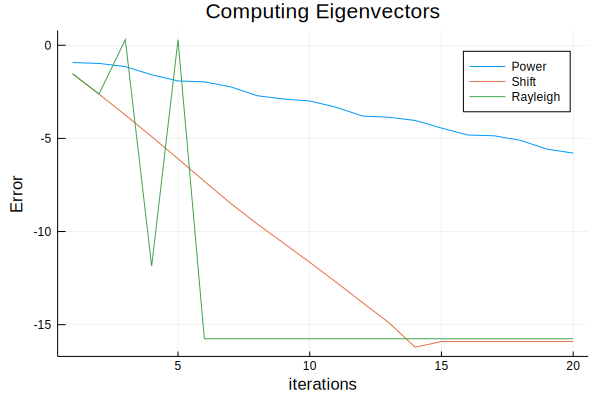

In [44]:
# BEGIN SOLUTION

# ALGORITHM 1 POWER ITERATION

eigenval(A, v) = v .* (A .*v)
error(x,y) = norm(x ./norm(x)-y ./norm(y))
A = [0 0 1 0.5; 1/3 0 0 0; 1/3 0.5 0 0.5; 1/3 0.5 0 0]
v = 1/31*[12 ; 4; 9; 6]
function power(A,v)
    e = []
    x = [1/2 ; 1/2 ; 1/2 ; 1/2]
    ev = eigenval(A, x)
    i = 0
    while true
        i = i + 1
        Ax = A*x
        x_new = Ax / norm(Ax)

        ev_new = eigenval(A, x_new)
        err = error(x_new, v)
        append!(e,[log10(err)])
        x = x_new
        ev = ev_new
        if i == 20
            return ev_new, x_new, e
        end
    end
    
end
# ALGORITHM 2 SHIFT-INVERT POWER INTEGRATION
A = [0 0 1 0.5; 1/3 0 0 0; 1/3 0.5 0 0.5; 1/3 0.5 0 0]
v = 1/31*[12 ; 4; 9; 6]
x = [1/2 ; 1/2 ; 1/2 ; 1/2]
function shift(A,v)
    x = [1/2 ; 1/2 ; 1/2 ; 1/2]
    sigma = 0.9
    ev = eigenval(A, x)
    i = 0
    e=[]
    while true
        i = i + 1
        Ax = inv(A-sigma*Matrix{Float64}(I, 4, 4))*x
        x_new = Ax / norm(Ax)

        ev_new = eigenval(A, x_new)
        err = error(x_new, v)
        append!(e,[log10(err)])
        x = x_new
        ev = ev_new
        if i == 20
            return ev_new, x_new, e
        end
    end
end
function rayleigh(A,v)
    x = [1/2 ; 1/2 ; 1/2 ; 1/2]
    sigma = 0.9
    ev = eigenval(A, x)
    i = 0
    e=[]
    while true
        i+=1
        if i > 2 && i < 6
            sigma = RQ(A,x) 
        end
        if i > 6
            append!(e,[log10(error(x,v))])
        else
            Ax = inv(A-sigma*Matrix{Float64}(I, 4, 4))*x
            x_new = Ax / norm(Ax)
            ev_new = eigenval(A, x_new)
            err = error(x_new, v)
            append!(e,[log10(err)])
            x = x_new
            ev = ev_new
        end
        if i == 20
            return ev, x, e
        end
    end
end

ev1, x1, e1 = power(A,v)

ev2, x2, e2 = shift(A,v)   

ev3, x3, e3 = rayleigh(A,v)
p1 = 1:20
p = plot(p1,e1, label="Power")
plot!(p,p1,e2, label= "Shift")
plot!(p,p1,e3,title="Computing Eigenvectors",label="Rayleigh" )
xlabel!("iterations")
ylabel!("Error")




# Part 4: PageRank

Read Example 3.5 on pages 73-75 of your textbook if you haven't already. You have been provided with two files ```pagerank_urls.txt``` and ```pagerank_adj.csv```. 

The first file contains a list of 2571 URLs  of webpages which we'll associate with the numbers 1 to 2571.

The provided data files consist of a modified version of web crawling data downloaded from https://www.limfinity.com/ir. The original dataset was created in January, 2004 so you might notice that some of the links are inactive. 

The second file contains a 2571 by 2571 matrix $\mathbf J$ where entry $i,j$ is $1$ if there exists a link from webpage $j$ to webpage $i$ and $0$ otherwise. The data has been filtered to not allow for links from a webpage to itself and not allow webpages without outgoing links.

The link matrix $\mathbf A$ described in the textbook can be obtained as 

$$
\mathbf A_{i,j} = \frac{\mathbf J_{i,j}}{\sum_{k=1}^N \mathbf J_{k,j}}
$$

(with $N = 2571$).

The columns of this link matrix $\mathbf A$ should add up to 1. 

In [36]:
URLs = readdlm("pagerank_urls.txt", ',', '\n');

In [37]:
J = readdlm("pagerank_adj.csv", ',', '\n');

In [38]:
N = size(J)[1]

2571

**Exercise:** Using your implementation of Algorithm 1 (power iteration method) with as many iterations as you need, obtain the page score vector $\mathbf x$ with entries adding up to 1 from the **modified link matrix** described in your textbook (with $\mu = 0.15$). Store the vector in a variable called ```x```.

A tip:
- **If** you'd like to compare to the value of the eigenvector produced by the ```eigen``` function, note that the eigenvalues and eigenvectors produced may be complex due to numerical precision error, but the relevant ones will have tiny imaginary part so you can obtain the real part using the ```real``` function. Moreover, remember to normalize your eigenvectors so that the entries are nonnegative and add up to 1 before comparing.

In [39]:
# BEGIN SOLUTION

x = ones((1,2571))*(1/sqrt(2571))
x = copy(x')
function power(A,x)
    e = []
    ev = eigenval(A, x)
    i = 0
    while true
        i = i + 1
        Ax = A*x
        x_new = Ax / norm(Ax)

        ev_new = eigenval(A, x_new)
#         err = error(x_new, v)
#         println(err)
#         append!(e,[log10(err)])
#         if norm(ev - ev_new) < 10^-8
#             return ev_new, x_new, e
#             break
#         end
        x = x_new
        ev = ev_new
        if i == 20
            return ev_new, x_new, e
        end
    end
    
end

# eg, x, err = power(J,x)
# x = x/sum(x)
# sum(x)
# # norm(x)

power (generic function with 1 method)

In [40]:
A = zeros((2571,2571))
for i = 1:2571
    for j = 1:2571
        A[i,j] = J[i,j]/sum(J[:,j])
    end
end
# A[1,:]


In [41]:
x = ones((1,2571))*(1/sqrt(2571))
x = copy(x')
eg, y, err = power(A,x)
x = Array{Float64, 1}
x=y[:,1];
# x
# println(sortperm(x))

The following code will print the 7 most important and least important webpages ranking by the value of the corresponding component in the eigenvector ```x```. The top 7 indices should be 2, 35, 36, 58, 49, 41, and 25. If those are what you get, then you've computed the eigenvector correctly. The indices of the worst seven webpages may vary by implementation due numerical precision error since their scores are very close to $0$. However, they should be similar kinds of URLs across implementations. 

In [42]:
for i in sortperm(x, rev=true)[1:7]
    println("Index: $(i)  Score: $(round(x[i],digits=4)) URL: $(URLs[i])")
end

Index: 2  Score: 0.4136 URL: http://www.hollins.edu/
Index: 35  Score: 0.3428 URL: http://www.hollins.edu/admissions/visit/visit.htm
Index: 36  Score: 0.3202 URL: http://www.hollins.edu/about/about_tour.htm
Index: 58  Score: 0.3122 URL: http://www.hollins.edu/htdig/index.html
Index: 49  Score: 0.2841 URL: http://www.hollins.edu/admissions/info-request/info-request.cfm
Index: 41  Score: 0.2637 URL: http://www.hollins.edu/admissions/apply/apply.htm
Index: 25  Score: 0.2394 URL: http://www.hollins.edu/admissions/admissions.htm


In [43]:
for i in sortperm(x)[1:7]
    println("Index: $(i)  Score: $(round(x[i],digits=4)) URL: $(URLs[i])")
end

Index: 1  Score: 0.0 URL: http://www1.hollins.edu/
Index: 3  Score: 0.0 URL: http://www1.hollins.edu/Docs/Forms/GetForms.htm
Index: 4  Score: 0.0 URL: http://www1.hollins.edu/Docs/misc/travel.htm
Index: 5  Score: 0.0 URL: http://www1.hollins.edu/Docs/GVCalendar/gvmain.htm
Index: 10  Score: 0.0 URL: http://www1.hollins.edu/Docs/comptech/comptech.htm
Index: 20  Score: 0.0 URL: http://www1.hollins.edu/Docs/CampusLife/CampusLife.htm
Index: 23  Score: 0.0 URL: http://www1.hollins.edu/security/Default.htm


**Exercise:** Reading the URLs above, do the rankings make sense? Why?

Answer: Looking at the top hit URLs, it makes sense that these are the most important since they are pages that are frequently used. Home pages, information pages and registration on this site get high traffic. Looking at the least scored sites, the url begins with www1. which indicates a site that requires authorizaiton or one that has been archived. Since they are not avaliable for the public, it makes sense they are 'less important' and less frequented. 

**Exercise:** If the link matrix $\mathbf A$ is transposed, it takes on the same structure as the transition matrices for the Markov chains described earlier hence describing a Markov chain in the same way as described earlier. How can the PageRank algorithm be interpreted in terms of Markov chains?

Answer: Some pages on a website can only be accessed through links on other specific pages. In other words there are paths that can be taken to get from one page to the next. We can then use the markov chains by considering the 'weights' as the likelyhood of page2 which is linked on page1 will be clicked relative to the other page1 links, given that the user is on page 1. Here each page is considered a stage in the chain and the edges between pages are the probabilities of reaching each site from the other. For example, if the registration site is the only link on a page, it gets a weight of 1.0 and if the contact us page cannot be reached from the registration page, it gets an edge of 0.0.

------------------------------------------------